- ___Nama  : MITASARI___
- ___Nim   : 09011381722122___
- ___Kelas : SK5___ 

# Intelligent Earthquake Prediction System Based On Neural Network 
# (Sistem Prediksi Gempa Bumi Berdasarkan Neural Network)

<div class="alert alert-success">
     <ul>
      <li>
     Memprediksi gempa bumi merupakan masalah penting dalam studi geografi. Prediksi yang akurat dari gempa bumi dapat membantu orang-orang dalam mengambil langkah-langkah untuk meminimalisir kerusakan seperti penghancuran bangunan, rusaknya lalu lintas yang terjadi dalam beberapa detik. Pusat Informasi Gempa (NEIC) menentukan lokasi dan semua gempa bumi yang terjadi diseluruh dunia dan segera menyebarkan informasi tersebut ke lembaga nasional dan internasional. Pada paper ini, untuk mendeteksi gempa bumi menggunakan jaringan syaraf tiruan. keuntungan dari metode ini bahwa tidak memerlukan asumsi, karena pada metode ini membuat prediksi yang sesuai dengan evolusi secara real time. Dalam memprediksi gempa bumi dilakukan dengan dua cara yaitu Automatic dilakukan secara otomatis dan Reviewed yang dilakukan secara manual.
      </li>
    </ul>
</div>

## 1. Dataset

<div class="alert alert-success">
     <ul>
      <li>
     Dataset yang digunakan mencakup catatan tanggal, waktu, latitude, longitude, magnitude, tipe, ID, sumber, lokasi, dan status. Output yang dihasilkan berupa binary klasifikasi atau dua kelas yaitu, Automatic dan Reviewed. 
      </li>
    </ul>
</div>

## 2. Penyelesaian Dengan Python

## Import Library
#### - Import Library yang digunakan

- __Preprocessing__

Ada sejumlah alat dan metode yang berbeda yang dapat digunakan untuk preprocessing, contohnya yaitu : transformasi yang memanipulasi data mentah untuk menghasilkan satu input, denoising yang menghilangkan noise dari data, dan lain sebagainya. MinMaxScaler itu memanipulasi sedemikian rupa sehingga menjadi data yang bernilai dari ranges 0 sampai 1.

- __Categorical__

Berfungsi untuk mengkonversikan data binary menjadi data yang dikelompokkan, sehingga data tersebut dapat diambil bagian-bagiannya sebagai sebuah confusion matrix. Parameter yang digunakan dalam confusion matrix adalah Categorical dan prediksi hasil training.

- __Model dan Layer__

Pada kasus ini, model yang digunakan untuk membuat hidden layer untuk memproses data adalah fungsi squential.Sedangkan layer sendiri menggunakantipe Danse yang melakukan training dengan menghubungkan setiap Neural Network secara sequential. 

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.activations import sigmoid
from keras.activations import relu
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix
from keras.optimizers import SGD

C:\Users\Lenovo\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


##  Load Dataset
### - load dataset yang digunakan
"database.csv" karena nama file pada dataset yaitu database.csv

In [3]:
datasetasli = pd.read_csv("database.csv")

### - Menampilkan Dataset Asli

In [4]:
datasetasli

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
5,01/10/1965,13:36:32,-13.4050,166.6290,Earthquake,35.00,NaN,NaN,6.7,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic
6,01/12/1965,13:32:25,27.3570,87.8670,Earthquake,20.00,NaN,NaN,5.9,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic
7,01/15/1965,23:17:42,-13.3090,166.2120,Earthquake,35.00,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic
8,01/16/1965,11:32:37,-56.4520,-27.0430,Earthquake,95.00,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEMSUP861125,ISCGEMSUP,ISCGEM,ISCGEM,Automatic
9,01/17/1965,10:43:17,-24.5630,178.4870,Earthquake,565.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861148,ISCGEM,ISCGEM,ISCGEM,Automatic


### - Menggunakan fitur dari pandas factorize. 
Pandas factorize atau pd.factorize() digunakan untuk mendapatkan nilai representasi numerik dari suatau array dengan mengidentifikasi nilai-nilai yang berbeda.

In [5]:
datasetbaru = datasetasli.apply(lambda col: pd.factorize(col, sort=True)[0])

### - Menampilkan Data yang telah diencode

In [6]:
datasetbaru

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,34,11784,14682,16287,0,1670,-1,-1,28,5,...,-1,-1,-1,-1,-1,2579,4,20,11,0
1,101,9865,11587,13420,0,1180,-1,-1,19,5,...,-1,-1,-1,-1,-1,2580,4,20,11,0
2,133,15447,4821,2000,0,450,-1,-1,31,5,...,-1,-1,-1,-1,-1,2581,4,20,11,0
3,235,16087,344,7646,0,359,-1,-1,19,5,...,-1,-1,-1,-1,-1,2582,4,20,11,0
4,267,11611,13396,13050,0,359,-1,-1,19,5,...,-1,-1,-1,-1,-1,2583,4,20,11,0
5,300,11665,6915,19759,0,665,-1,-1,42,5,...,-1,-1,-1,-1,-1,2584,4,20,11,0
6,367,11603,15547,9828,0,450,-1,-1,25,5,...,-1,-1,-1,-1,-1,2585,4,20,11,0
7,464,19887,6940,19586,0,665,-1,-1,28,5,...,-1,-1,-1,-1,-1,2586,4,20,11,0
8,500,9900,624,7345,0,1320,-1,-1,28,5,...,-1,-1,-1,-1,-1,2710,5,20,11,0
9,535,9194,3637,21221,0,3059,-1,-1,19,5,...,-1,-1,-1,-1,-1,2587,4,20,11,0


### - Mengambil nilai pada input feature dan output label  
Untuk feature :,0:20 artinya kolom 0 sampai dengan 19 karena pada dataset terdiri dari 21 kolom. Dan untuk label :,20 artinya kolom ke 20 sebagai output.

In [7]:
feature = np.array(datasetbaru.ix[:,0:20])
label = np.array(datasetbaru.ix[:,20])

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


### - Distribusi Nilai Label  

distribusi awal label automatic = 2639, label reviewed = 20773


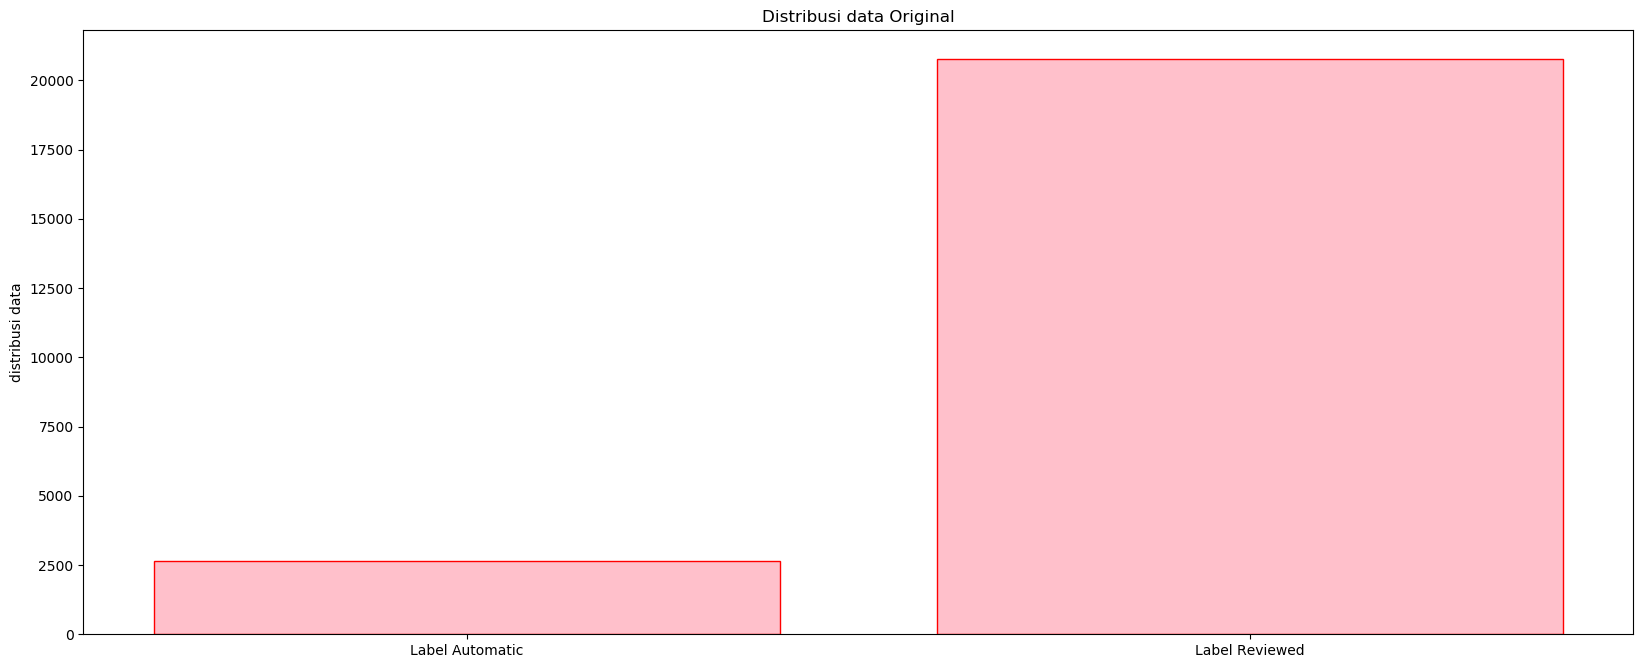

In [8]:
automatic = np.where(label == 0)[0]
reviewed = np.where(label == 1)[0]

print('distribusi awal label automatic = {0}, label reviewed = {1}'.format(len(automatic),len(reviewed)))

objects = ('Label Automatic','Label Reviewed')

label_pos = np.arange(len(objects))
distribution = [len(automatic), len(reviewed)]
fig = plt.figure(figsize=(20, 8), dpi=100)
plt.bar(label_pos, distribution, color='pink', edgecolor='red')
plt.xticks(label_pos, objects)
plt.ylabel('distribusi data')
plt.title('Distribusi data Original')
plt.show()

### - Normalisasi atau preprocessing data.  
Normalisasi disini merupakan penskalaan nilai atribut dari data sehingga bisa jatuh pada range tertentu. Metode normalisasi yang digunakan yaitu Min Max, Metode Min-Max merupakan metode normalisasi dengan melakukan transformasi linier terhadap data asli.

In [9]:
scaler = MinMaxScaler() 
feature_scale = scaler.fit_transform(feature)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


### - Pembagian atau split data 

In [10]:
training_data, testing_data, training_label, testing_label = train_test_split(feature_scale, label, test_size=0.2, shuffle=True)

### - Model ANN  
<div class="alert alert-success">
     <ul>
      <li>
     Model ANN yang digunakan dengan hidden layer 1 dan node pada hidden layer 100, input layer 1 dan node input layer 20. 
Fungsi aktivasi yang digunakan yaitu Relu. Fungsi aktivasi ReLu merupakan fungsi aktivasi yang paling sering digunakan untuk saat ini. ReLu digunakan untuk hidden layer dan mempunyai output 0 jika input kurang dari 0. Jika input lebih besar dari 0, output sama dengan input. 
      </li>
    </ul>
</div>

In [11]:
model = Sequential()
model.add(Dense(units= 100, input_dim = 20, activation=relu))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation=sigmoid))
model.compile(optimizer=SGD(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])

### - Akurasi Training dan Testing, serta Prediksi Training dan Testing

In [12]:
acc_training = model.fit(training_data, training_label, validation_data=(testing_data, testing_label), epochs=15)
acc_test = model.evaluate(testing_data, testing_label)
prediksi_label_training = model.predict(training_data)
prediksi_label_testing = model.predict(testing_data)

Train on 18729 samples, validate on 4683 samples
Epoch 1/15
18729/18729 [==============================] - 4s 192us/step - loss: 0.2837 - accuracy: 0.8798 - val_loss: 0.1956 - val_accuracy: 0.8937
Epoch 2/15
18729/18729 [==============================] - 1s 74us/step - loss: 0.1835 - accuracy: 0.8910 - val_loss: 0.1313 - val_accuracy: 0.8984
Epoch 3/15
18729/18729 [==============================] - 1s 74us/step - loss: 0.1256 - accuracy: 0.9393 - val_loss: 0.0889 - val_accuracy: 0.9816
Epoch 4/15
18729/18729 [==============================] - 2s 90us/step - loss: 0.0907 - accuracy: 0.9784 - val_loss: 0.0637 - val_accuracy: 0.9964
Epoch 5/15
18729/18729 [==============================] - 2s 110us/step - loss: 0.0699 - accuracy: 0.9902 - val_loss: 0.0489 - val_accuracy: 0.9972
Epoch 6/15
18729/18729 [==============================] - 2s 86us/step - loss: 0.0567 - accuracy: 0.9940 - val_loss: 0.0389 - val_accuracy: 0.9972
Epoch 7/15
18729/18729 [==============================] - 2s 102us/

### - Prediksi Nilai Training

In [13]:
prediksi_label_training = model.predict(training_data)
print(prediksi_label_training)

[[0.9993857 ]
 [0.99977195]
 [0.9939501 ]
 ...
 [0.9998973 ]
 [0.9999897 ]
 [0.9978738 ]]


### - Prediksi Nilai Testing

In [14]:
prediksi_label_testing = model.predict(testing_data)
print(prediksi_label_testing)

[[0.05923408]
 [0.9999001 ]
 [0.9999236 ]
 ...
 [0.9960133 ]
 [0.99984944]
 [0.9998196 ]]


### - Confusion Matrix 

Confusion matrix adalah salah satu metrics yang paling intuitif dan mudah yang dapat digunakan untuk menemukan kebenaran dan akurasi model. Confusion matrix ini juga merupakan suatu metode yang dapat digunakan untuk mengukur kinerja dari suatu metode klasifikasi.  istilah-istilah dalam confusion matrix:  
- __1. TP (True Positive)__  
 True positive adalah ketika kelas aktual pada data point adalah 1 (True) dan prediksi juga 1 (True). Atau merupakan data positif yang terdeteksi benar.   
- __2. TN (True Negative)__  
True negative adalah ketika kelas actual pada data point 0 (False) dan prediksi juga 0 (negatif). Atau merupakan jumlah data  negatif yang terdeteksi dengan benar.  
- __3. FP (False Positive)__   
False positive adalah ketika kelas aktual pada data point 0 (False) dan prediksi 1 (True). False adalah karena model telah diprediksi salah dan positif karena kelas diprediksi yang positif (1). Atau merupakan data negatif yang terdeteksi dengan benar.   
- __4. FN (False Negative)__  
False negative adalah ketika kelas pada data point 1 (True) dan prediksi 0 (False). False karena model telah diprediksi benar dan negatif karena kelas diprediksi yang negatif (0). Atau merupakan kebalikan dari true positif dimana data positif namun terdeteksi sebagai data negatif. 

In [15]:
import numpy as np
for x in np.arange(len(prediksi_label_training)):
    if (prediksi_label_training[x] > 0.5):
        prediksi_label_training[x] = 1
    else:
        prediksi_label_training[x] = 0
        
for x in np.arange(len(prediksi_label_testing)):
    if (prediksi_label_testing[x] > 0.5):
        prediksi_label_testing[x] = 1
    else:
        prediksi_label_testing[x] = 0

In [16]:
CM1 = confusion_matrix(training_label, prediksi_label_training).ravel()
TP1, FP1, FN1, TN1 = CM1
print(CM1)

[ 2141     0    44 16544]


In [17]:
CM2 = confusion_matrix(testing_label, prediksi_label_testing).ravel()
TP2, FP2, FN2, TN2 = CM2
print(CM2)

[ 498    0   10 4175]


### - Akurasi, Presisi, Sensitivity, Specificity, F1 Score, dan Error

- ___1. Akurasi___  

Akurasi dalam masalah klasifikasi merupakan prediksi jumlah benar dari kesuluruhan data. Nilai dari akurasi dapat menjelaskan seberapa akurat sistem dapat mengklasifikasikan data secara benar. Dirumuskan dengan:
(TP + TN) / (TP+FP+FN+TN)

- ___2. Presisi___ 

Presisi merupakan tingkat dari ketepatan antara pengguna yang meminta informasi dengan jawaban yang diberikan oleh sistem. Presisi dalam sistem pengukuran dapat diartikan sebagai tingkatan dimana pengukuran berulang pada kondisi yang tidak berubah akan menghasilkan yang sama. Dirumuskan dengan:  
TP / TP + FP  

- ___3. Sensitivity___    

digunakan untuk mengukur proporsi positif yang sebenarnya dan diidentifikasi dengan benar. Dirumuskan dengan:  
TP/ (TP+FN)  

- ___4. Specificity___ 

digunakan untuk mengukur proporsi negative yang sebenarnya dan diidentifikasi dengan benar. Dirumuskan dengan:  
TN / TN + FP

### - Akurasi, Presisi, Sensitivity, Specificity, F1 Score, dan Error dari Training

In [18]:
Akurasi_training = (TP1 + TN1) / (TP1+FP1+FN1+TN1)
print(Akurasi_training)

0.9976507021197074


In [19]:
Presisi_training = TP1 / TP1 + FP1
print(Presisi_training)

1.0


In [20]:
Sensitivity_training = TP1/ (TP1+FN1)
print(Sensitivity_training)

0.9798627002288329


In [21]:
Specificity_training = TN1 / TN1 + FP1
print(Specificity_training)

1.0


In [22]:
F1_score_training = 2*(Sensitivity_training*Presisi_training)/(Sensitivity_training+Presisi_training)
print(F1_score_training)

0.989828941285252


In [23]:
Error_training = (FP1 + FN1) / (FP1 + FN1 + TN1 + TP1)
print(Error_training)

0.0023492978802925942


### - Akurasi, Presisi, Sensitivity, Specificity, F1 Score, dan Error dari Testing

In [24]:
Akurasi_testing = (TP2 + TN2) / (TP2+FP2+FN2+TN2)
print(Akurasi_testing)

0.9978646166986974


In [25]:
Presisi_testing = TP2 / TP2 + FP2
print(Presisi_testing)

1.0


In [26]:
Sensitivity_testing = TP2/ (TP2+FN2)
print(Sensitivity_testing)

0.9803149606299213


In [27]:
Specificity_testing = TN2 / TN2 + FP2
print(Specificity_testing)

1.0


In [28]:
F1_score_testing = 2*(Sensitivity_testing*Presisi_testing)/(Sensitivity_testing+Presisi_testing)
print(F1_score_testing)

0.9900596421471173


In [29]:
Error_testing = (FP2 + FN2) / (FP2 + FN2 + TN2 + TP2)
print(Error_testing)

0.002135383301302584


### - Menampilkan model Akurasi

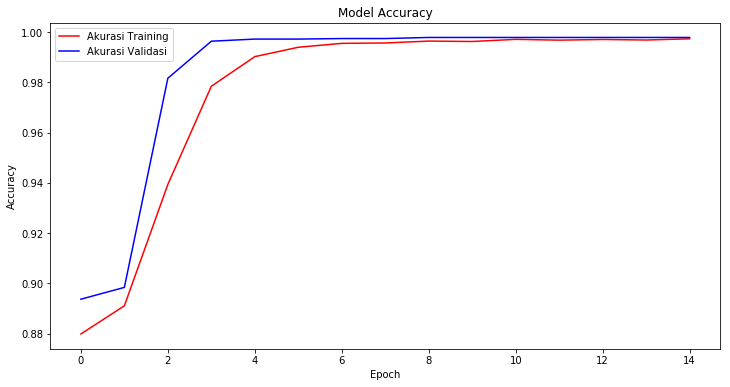

In [30]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,6))
ax0.plot(acc_training.history['accuracy'],'red', label='Akurasi Training')
ax0.plot(acc_training.history['val_accuracy'], 'blue', label='Akurasi Validasi')
ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Accuracy")
ax0.legend()

### - Menampilkan Model Loss

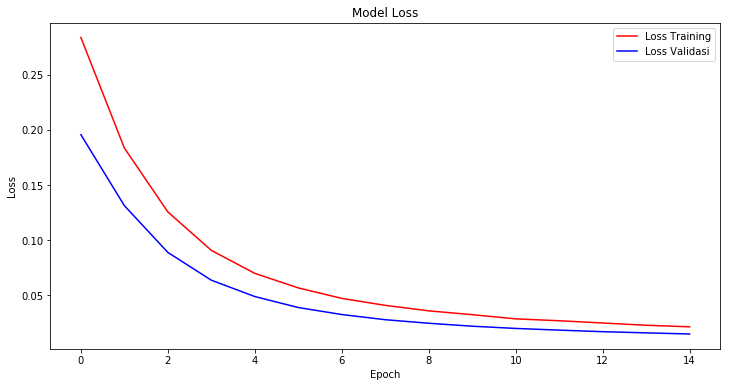

In [31]:
fig,(ax1) = plt.subplots(nrows=1, figsize=(12,6))
ax1.plot(acc_training.history['loss'],'red', label='Loss Training')
ax1.plot(acc_training.history['val_loss'], 'blue', label='Loss Validasi')
ax1.plot(label='Loss', loc='upper left')
ax1.set_title('Model Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()

### - Menampilkan Model Summary

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               2100      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 2,201
Trainable params: 2,201
Non-trainable params: 0
_________________________________________________________________
